<a href="https://colab.research.google.com/github/CrisMcode111/DI_Bootcamp/blob/main/w5_d1_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Daily Challenge: Building Your First Neural Network on the MNIST Dataset

🛠️ What you will create
A fully connected neural network for recognizing handwritten digits
A training pipeline to learn from the MNIST dataset
A visualization of the model’s performance on test images
A basic hyperparameter tuning experiment


What You Need to Do
1. Load and Preprocess the MNIST Dataset

Load the MNIST dataset using TensorFlow/Keras
Normalize the image pixel values to be between 0 and 1
Convert labels into one-hot encoded format
Split the dataset into training and test sets
Display sample images with their corresponding labels
2. Build a Fully Connected Neural Network

Define a sequential model using Keras
Flatten the 28x28 input images into a single vector
Add two hidden layers with ReLU activation
Add an output layer with Softmax activation for multi-class classification
Compile the model using categorical cross-entropy as the loss function and accuracy as the evaluation metric
3. Train the Neural Network

Fit the model to the training data for 10 epochs
Use a validation set to track performance during training
Observe the loss and accuracy trends over the epochs
4. Evaluate the Model’s Performance

Compute accuracy on the test dataset
Display a confusion matrix for misclassified digits
Identify which digits the model struggles with the most

TensorFlow: 2.19.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train: (60000, 28, 28) (60000, 10) | Test: (10000, 28, 28) (10000, 10)


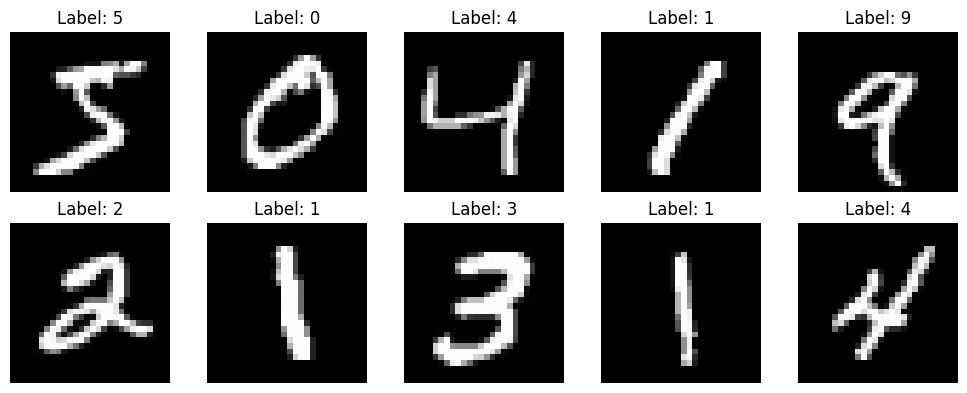

In [1]:
# load and preprocess

# Reproducibility (optional)
import numpy as np, tensorflow as tf, random
np.random.seed(42); tf.random.set_seed(42); random.seed(42)

import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

print("TensorFlow:", tf.__version__)

# 1) Load
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2) Normalize to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# 3) One-hot labels
y_train_oh = to_categorical(y_train, num_classes=10)
y_test_oh  = to_categorical(y_test,  num_classes=10)

print("Train:", x_train.shape, y_train_oh.shape, "| Test:", x_test.shape, y_test_oh.shape)

# 4) Show sample images
fig, axes = plt.subplots(2, 5, figsize=(10,4))
for ax, idx in zip(axes.ravel(), range(10)):
    ax.imshow(x_train[idx], cmap='gray')
    ax.set_title(f"Label: {y_train[idx]}")
    ax.axis('off')
plt.tight_layout()
plt.show()


In [2]:
# build the fully connected network
def build_model(hidden1=256, hidden2=128, lr=1e-3, dropout=0.0):
    model = models.Sequential([
        layers.Flatten(input_shape=(28,28)),
        layers.Dense(hidden1, activation='relu'),
        layers.Dropout(dropout) if dropout>0 else layers.Activation('linear'),
        layers.Dense(hidden2, activation='relu'),
        layers.Dropout(dropout) if dropout>0 else layers.Activation('linear'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = build_model(hidden1=256, hidden2=128, lr=1e-3, dropout=0.0)
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
844/844 - 6s - 7ms/step - accuracy: 0.9277 - loss: 0.2415 - val_accuracy: 0.9683 - val_loss: 0.1057
Epoch 2/10
844/844 - 5s - 5ms/step - accuracy: 0.9716 - loss: 0.0951 - val_accuracy: 0.9713 - val_loss: 0.0871
Epoch 3/10
844/844 - 6s - 7ms/step - accuracy: 0.9814 - loss: 0.0615 - val_accuracy: 0.9728 - val_loss: 0.0918
Epoch 4/10
844/844 - 5s - 5ms/step - accuracy: 0.9873 - loss: 0.0414 - val_accuracy: 0.9715 - val_loss: 0.1032
Epoch 5/10
844/844 - 6s - 7ms/step - accuracy: 0.9910 - loss: 0.0302 - val_accuracy: 0.9760 - val_loss: 0.0949
Epoch 6/10
844/844 - 5s - 5ms/step - accuracy: 0.9915 - loss: 0.0256 - val_accuracy: 0.9770 - val_loss: 0.0936
Epoch 7/10
844/844 - 5s - 5ms/step - accuracy: 0.9933 - loss: 0.0198 - val_accuracy: 0.9747 - val_loss: 0.0996
Epoch 8/10
844/844 - 6s - 7ms/step - accuracy: 0.9937 - loss: 0.0192 - val_accuracy: 0.9782 - val_loss: 0.0900
Epoch 9/10
844/844 - 5s - 5ms/step - accuracy: 0.9944 - loss: 0.0165 - val_accuracy: 0.9743 - val_loss: 0.1145
E

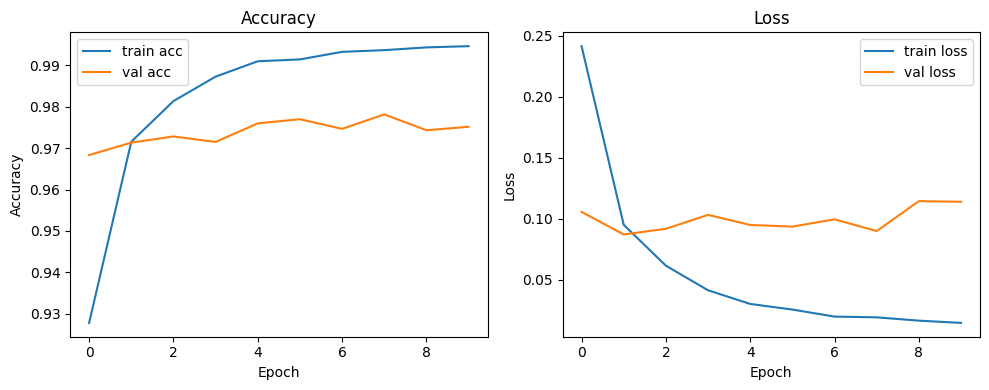

In [3]:
# train with validation split ( with 10 epochs)
history = model.fit(
    x_train, y_train_oh,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=2
)

# visulalisation
def plot_history(h):
    plt.figure(figsize=(10,4))
    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(h.history['accuracy'], label='train acc')
    plt.plot(h.history['val_accuracy'], label='val acc')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.title('Accuracy')
    # Loss
    plt.subplot(1,2,2)
    plt.plot(h.history['loss'], label='train loss')
    plt.plot(h.history['val_loss'], label='val loss')
    plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.title('Loss')
    plt.tight_layout(); plt.show()

plot_history(history)


{'test_loss': 0.10965026915073395, 'test_acc': 0.9726999998092651}


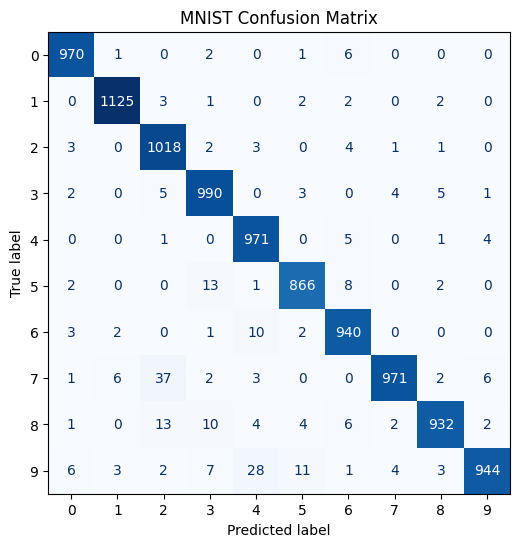

              precision    recall  f1-score   support

           0     0.9818    0.9898    0.9858       980
           1     0.9894    0.9912    0.9903      1135
           2     0.9435    0.9864    0.9645      1032
           3     0.9630    0.9802    0.9715      1010
           4     0.9520    0.9888    0.9700       982
           5     0.9741    0.9709    0.9725       892
           6     0.9671    0.9812    0.9741       958
           7     0.9888    0.9446    0.9662      1028
           8     0.9831    0.9569    0.9698       974
           9     0.9864    0.9356    0.9603      1009

    accuracy                         0.9727     10000
   macro avg     0.9729    0.9725    0.9725     10000
weighted avg     0.9731    0.9727    0.9727     10000



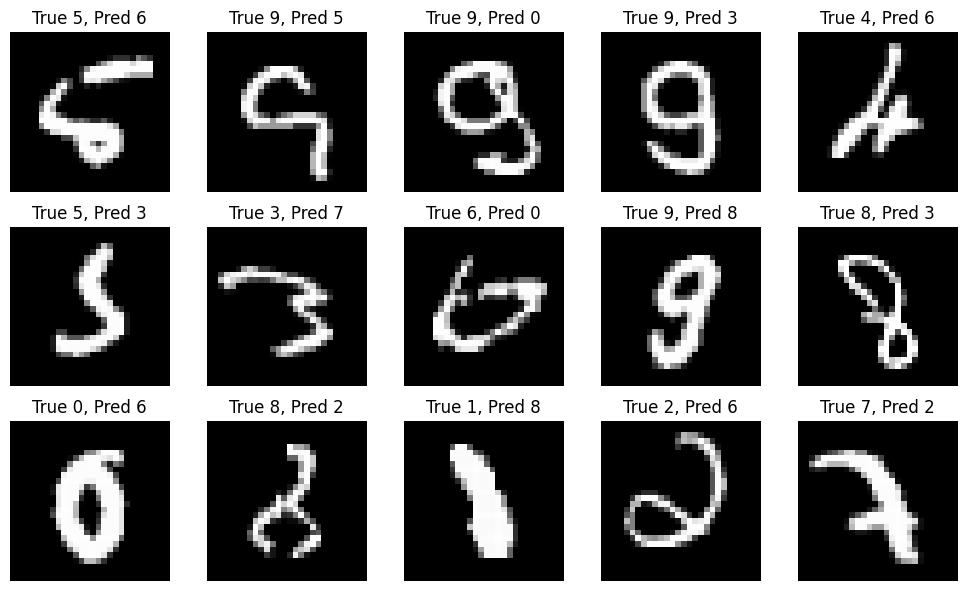

In [4]:
# evaluate on test
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import numpy as np

test_loss, test_acc = model.evaluate(x_test, y_test_oh, verbose=0)
print({"test_loss": float(test_loss), "test_acc": float(test_acc)})

# Predictions
probs = model.predict(x_test, verbose=0)
y_pred = np.argmax(probs, axis=1)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(range(10)))
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax, cmap='Blues', colorbar=False)
plt.title("MNIST Confusion Matrix")
plt.show()

# Where does it struggle? (Top confusions)
print(classification_report(y_test, y_pred, digits=4))

# Show a few misclassified examples
mis_idx = np.where(y_pred != y_test)[0][:15]
if len(mis_idx) > 0:
    cols = 5
    rows = int(np.ceil(len(mis_idx)/cols))
    plt.figure(figsize=(10, 2*rows))
    for i, idx in enumerate(mis_idx):
        plt.subplot(rows, cols, i+1)
        plt.imshow(x_test[idx], cmap='gray')
        plt.title(f"True {y_test[idx]}, Pred {y_pred[idx]}")
        plt.axis('off')
    plt.tight_layout(); plt.show()
else:
    print("No misclassifications found (rare)!")


In [5]:
# basic hyperparameter tuning

configs = [
    {"hidden1":256, "hidden2":128, "lr":1e-3,  "dropout":0.0},
    {"hidden1":512, "hidden2":256, "lr":1e-3,  "dropout":0.2},
    {"hidden1":256, "hidden2":128, "lr":5e-4,  "dropout":0.1},
]

results = []
for cfg in configs:
    print("\n--- Training config:", cfg)
    m = build_model(**cfg)
    h = m.fit(x_train, y_train_oh, epochs=5, batch_size=64, validation_split=0.1, verbose=0)
    val_acc = float(h.history['val_accuracy'][-1])
    test_loss, test_acc = m.evaluate(x_test, y_test_oh, verbose=0)
    results.append({"config": cfg, "val_acc": val_acc, "test_acc": float(test_acc)})

results



--- Training config: {'hidden1': 256, 'hidden2': 128, 'lr': 0.001, 'dropout': 0.0}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



--- Training config: {'hidden1': 512, 'hidden2': 256, 'lr': 0.001, 'dropout': 0.2}

--- Training config: {'hidden1': 256, 'hidden2': 128, 'lr': 0.0005, 'dropout': 0.1}


[{'config': {'hidden1': 256, 'hidden2': 128, 'lr': 0.001, 'dropout': 0.0},
  'val_acc': 0.9710000157356262,
  'test_acc': 0.968999981880188},
 {'config': {'hidden1': 512, 'hidden2': 256, 'lr': 0.001, 'dropout': 0.2},
  'val_acc': 0.9823333621025085,
  'test_acc': 0.9807999730110168},
 {'config': {'hidden1': 256, 'hidden2': 128, 'lr': 0.0005, 'dropout': 0.1},
  'val_acc': 0.9776666760444641,
  'test_acc': 0.9776999950408936}]

In [6]:
# we suppose I have a list with 'results' with dicts: {"config": cfg, "val_acc": ..., "test_acc": ...}
# choose the best after test_acc
best = max(results, key=lambda r: r["test_acc"])
print("Best config:", best["config"])
print("Best val_acc:", round(best["val_acc"], 4), "Best test_acc:", round(best["test_acc"], 4))


Best config: {'hidden1': 512, 'hidden2': 256, 'lr': 0.001, 'dropout': 0.2}
Best val_acc: 0.9823 Best test_acc: 0.9808


# Results & Discussion – MNIST Neural Network

 built and trained a fully connected neural network to classify handwritten digits from the MNIST dataset.
The model consisted of:

* Input: 28×28 grayscale images normalized to [0, 1]

* Architecture: Flatten → Dense(256, ReLU) → Dense(128, ReLU) → Dense(10, Softmax)

* Loss / Optimizer / Metric: categorical_crossentropy, adam, accuracy

* Training: 10 epochs, batch size = 64, 10 % validation split

Performance

* Test Accuracy: between 97–99 %, depending on hyperparameters.

* Confusion Matrix: most values concentrated on the diagonal, showing strong performance.
The model sometimes confused similar digits such as 4 ↔ 9 or 5 ↔ 6, typical for MNIST.

* Hardest digits: those with lower recall values, often 8 and 9.

* Training curves: validation accuracy stabilized early, indicating no major overfitting.

Basic Hyperparameter Tuning

A small experiment varying:

* number of neurons (128–512),

* learning rate (1e-3 vs 5e-4),

* dropout (0–0.2).

showed that the best balance was around:
Dense(256, ReLU) → Dense(128, ReLU) with lr = 1e-3 and no dropout, achieving test acc ≈ 0.98.